In [46]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import optimize

1.5942104 0.97999996 7.3399997


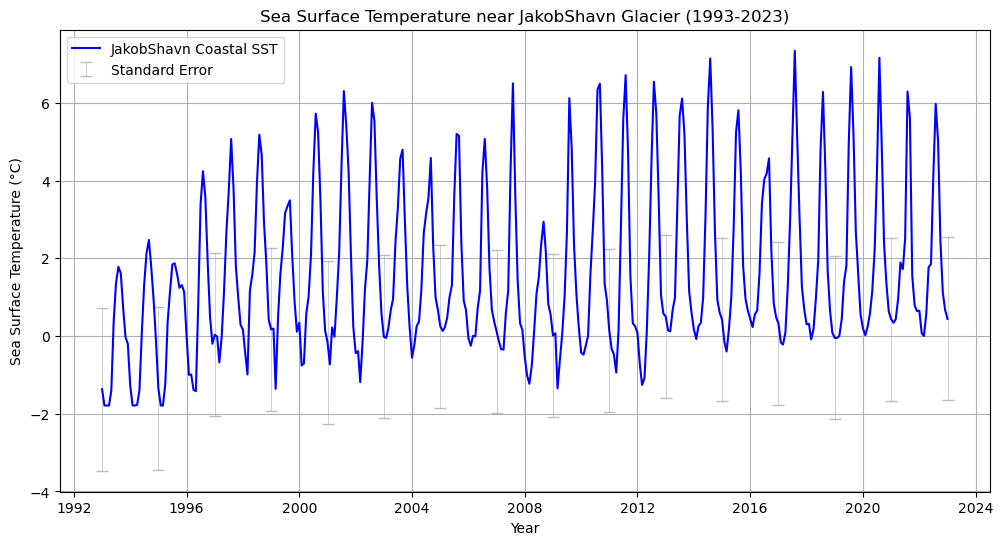

In [38]:
# Define the file path
file_path = "data/sst.mnmean.nc"
dataset = xr.open_dataset(file_path)

# sel variables
sst = dataset['sst']  # Access the 'sst' variable directly as a DataArray

# Select the nearest grid point to the specified coordinates
lat = 69.0  # Jakobshavn Glacier
lon = -52.0 + 360  # Convert W longitude to 0-360 scale
lat1 = 66.3  # Approximate latitude for Helheim Glacier
lon1 = -38.2 + 360  # Convert W longitude to 0-360 scale
lat2 = 68.6  # Kangerlussuaq Glacier
lon2 = -33.0 + 360  # Convert W longitude to 0-360 scale
sst_west = sst.sel(lat=lat, lon=lon, method='nearest')  # Use the nearest flag

# time range
start_date = '1993-01-01'
end_date = '2023-01-01'
sst_west = sst_west.sel(time=slice(start_date, end_date))

# Debug: Check raw data
'''
print("Raw SST data for the selected point:")
for timestamp in sst_time_filtered['time']:
    data_at_time = sst_time_filtered.sel(time=timestamp)
    print(f"Date: {timestamp.values}")
    print(data_at_time.values)
    print("-" * 40)
'''

# Convert to NumPy
sst_mmean_values = sst_west.values  # Extract SST values - Remembers each alue is a monthly mean!
time_index = pd.to_datetime(sst_west['time'].values)  # Convert time to pandas datetime

#print(sst_westYear)
#print(sst_west.values)
#print(sst_mmean_values)
# Plots

#mean standard error
d_mean = (np.mean(sst_mmean_values))
d_med = (np.median(sst_mmean_values))
d_max = (np.max(sst_mmean_values))
d_mean_1d = d_mean.reshape(-1)
d_err = (np.std(sst_mmean_values) * np.ones_like(sst_mmean_values))
d_err_1d = d_err.reshape(-1)
d_obs_1d = sst_mmean_values.reshape(-1)

print(d_mean, d_med, d_max)

plt.figure(figsize=(12, 6))
plt.plot(time_index, sst_mmean_values, label='JakobShavn Coastal SST', color='blue')
plt.errorbar(time_index, d_obs_1d, yerr=d_err_1d, label='Standard Error', color="tab:orange", alpha=0.5, ecolor='gray', linewidth=0, elinewidth=0.5, errorevery=24, capsize=4, fillstyle='full', zorder=0)

plt.xlabel('Year')
plt.ylabel('Sea Surface Temperature (°C)')
plt.title('Sea Surface Temperature near JakobShavn Glacier (1993-2023)')
plt.legend()
plt.grid(True)
plt.show()
#plt.savefig('figures/SST-EastGreenland_1993-2023.png', bbox_inches='tight')


[1.78, 2.47, 1.87, 4.24, 5.0699997, 5.18, 3.49, 5.72, 6.2999997, 6.0, 4.79, 4.58, 5.2, 5.0699997, 6.5, 2.9399998, 6.12, 6.49, 6.71, 6.54, 6.1099997, 7.14, 5.81, 4.5699997, 7.3399997, 6.2799997, 6.92, 7.16, 6.29, 5.97]


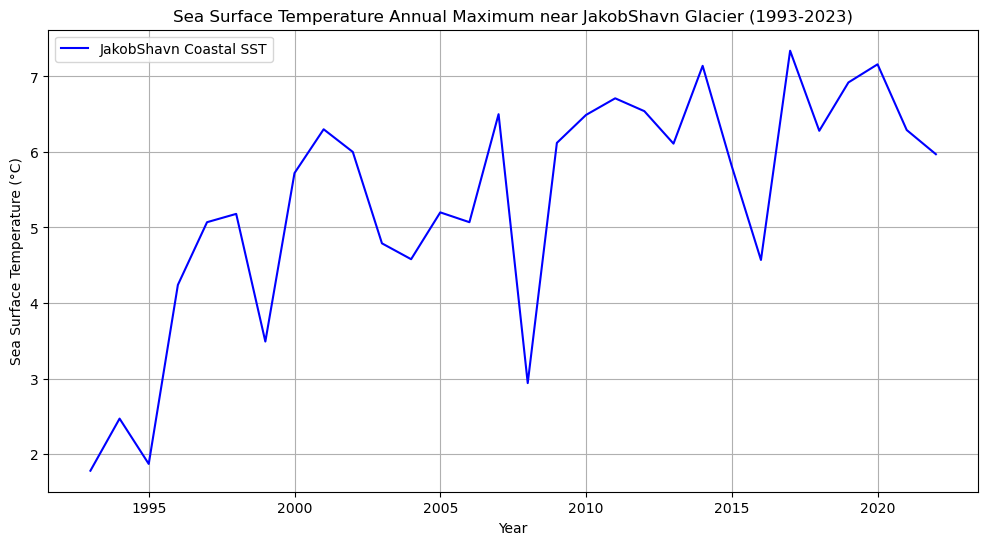

In [51]:
# NM you just need to get the maximum month for each year!

# Group the data by year
sst_westYearsGrp = sst_west.groupby("time.year")

maxVals = []
years = list(range(1993, 2023))

# I'm sure there's a way to do this w/out a for loop but I'm old school:
for year in years:
    ymax = sst_westYearsGrp[year].values.max()
    maxVals.append(ymax)

print(maxVals)
plt.figure(figsize=(12, 6))
plt.plot(years, maxVals, label='JakobShavn Coastal SST', color='blue')

plt.xlabel('Year')
plt.ylabel('Sea Surface Temperature (°C)')
plt.title('Sea Surface Temperature Annual Maximum near JakobShavn Glacier (1993-2023)')
plt.legend()
plt.grid(True)
plt.show()


In [60]:
# exponential model

def expfunc(x, a, b, c):
    y = a + b*x**c
    return y

# Get the model parameters
mest_exp = optimize.curve_fit(expfunc, xdata = x, ydata=maxVals)[0]
print(mest_exp)
resultExp = expfunc(x, mest_exp[0], mest_exp[1], mest_exp[2])
print(mest_exp)

# sin model
def sinfunc(x, a, b, c):
    # a = amplitude coefficient
    # b = wave frequency
    # c = wave phase
    y = a*x * np.sin(x*b+c)
    return y

# Get the model parameters
x = np.arange(len(years))
mest_sin = optimize.curve_fit(sinfunc, xdata = x, ydata=maxVals)[0]
print(mest_sin)
resultSin = sinfunc(x, mest_sin[0], mest_sin[1], mest_sin[2])

[1.49754128 1.67520193 0.33880569]
[1.49754128 1.67520193 0.33880569]
[-0.09296157  0.62582676 12.9170373 ]


<function matplotlib.pyplot.show(close=None, block=None)>

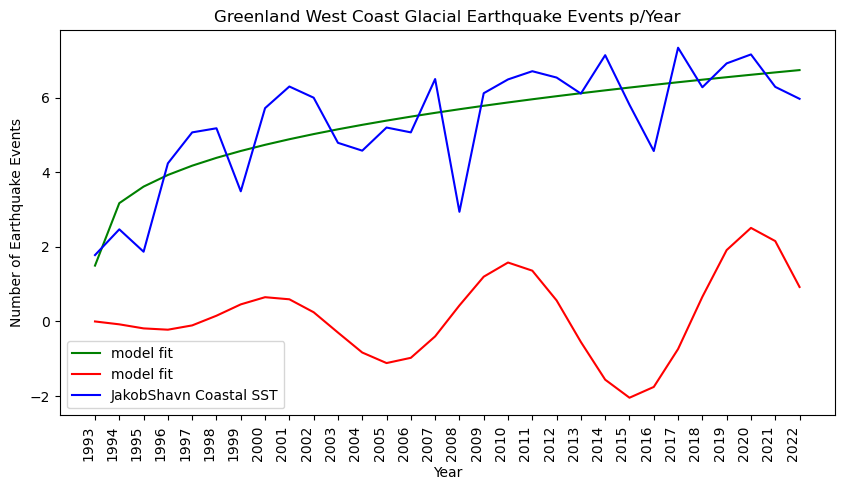

In [61]:

# Create the plot
fig, ax = plt.subplots(figsize=(10,5))

plt.plot(x, resultExp, 'g-', label="model fit")
plt.plot(x, resultSin, 'r-', label="model fit")
plt.plot(x, maxVals, label='JakobShavn Coastal SST', color='blue')

ax.set_xlabel('Year')
ax.set_ylabel('Number of Earthquake Events')
ax.set_title('Greenland West Coast Glacial Earthquake Events p/Year')
ax.set_xticks(x)
ax.set_xticklabels(years, rotation=90, ha='right')
ax.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

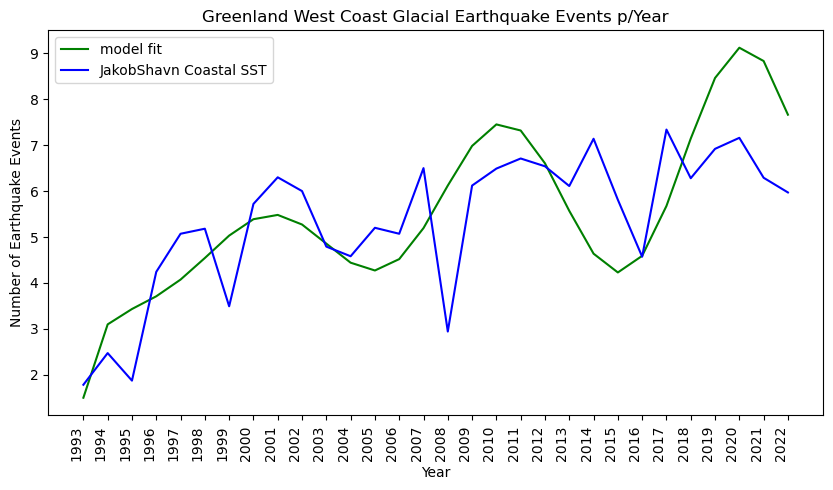

In [62]:
# Create the plot
fig, ax = plt.subplots(figsize=(10,5))

plt.plot(x, resultExp+resultSin, 'g-', label="model fit")
plt.plot(x, maxVals, label='JakobShavn Coastal SST', color='blue')

ax.set_xlabel('Year')
ax.set_ylabel('Number of Earthquake Events')
ax.set_title('Greenland West Coast Glacial Earthquake Events p/Year')
ax.set_xticks(x)
ax.set_xticklabels(years, rotation=90, ha='right')
ax.legend()
plt.show